<a href="https://colab.research.google.com/github/linhkid/gdg-codelab-25/blob/main/multiagent/GDG_Gemma2_0_multiagent_funccall_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codelab: Build Your First Agentic AI with Gemma 2.0 and KerasHub  

Welcome to this **Codelab**, where you'll learn how to build your **first agentic AI** using **Gemma 2.0** and **KerasHub**.  

In this hands-on guide, you'll explore:  
✅ The fundamentals of **agentic AI**  
✅ How **Gemma 2.0** enhances AI capabilities  
✅ Using **KerasHub** for seamless model integration  
✅ Step-by-step implementation to build your AI  

By the end, you'll have a working AI agent and a solid understanding of the core concepts.
Let's dive in! 🔥  

# What is Gemma ?
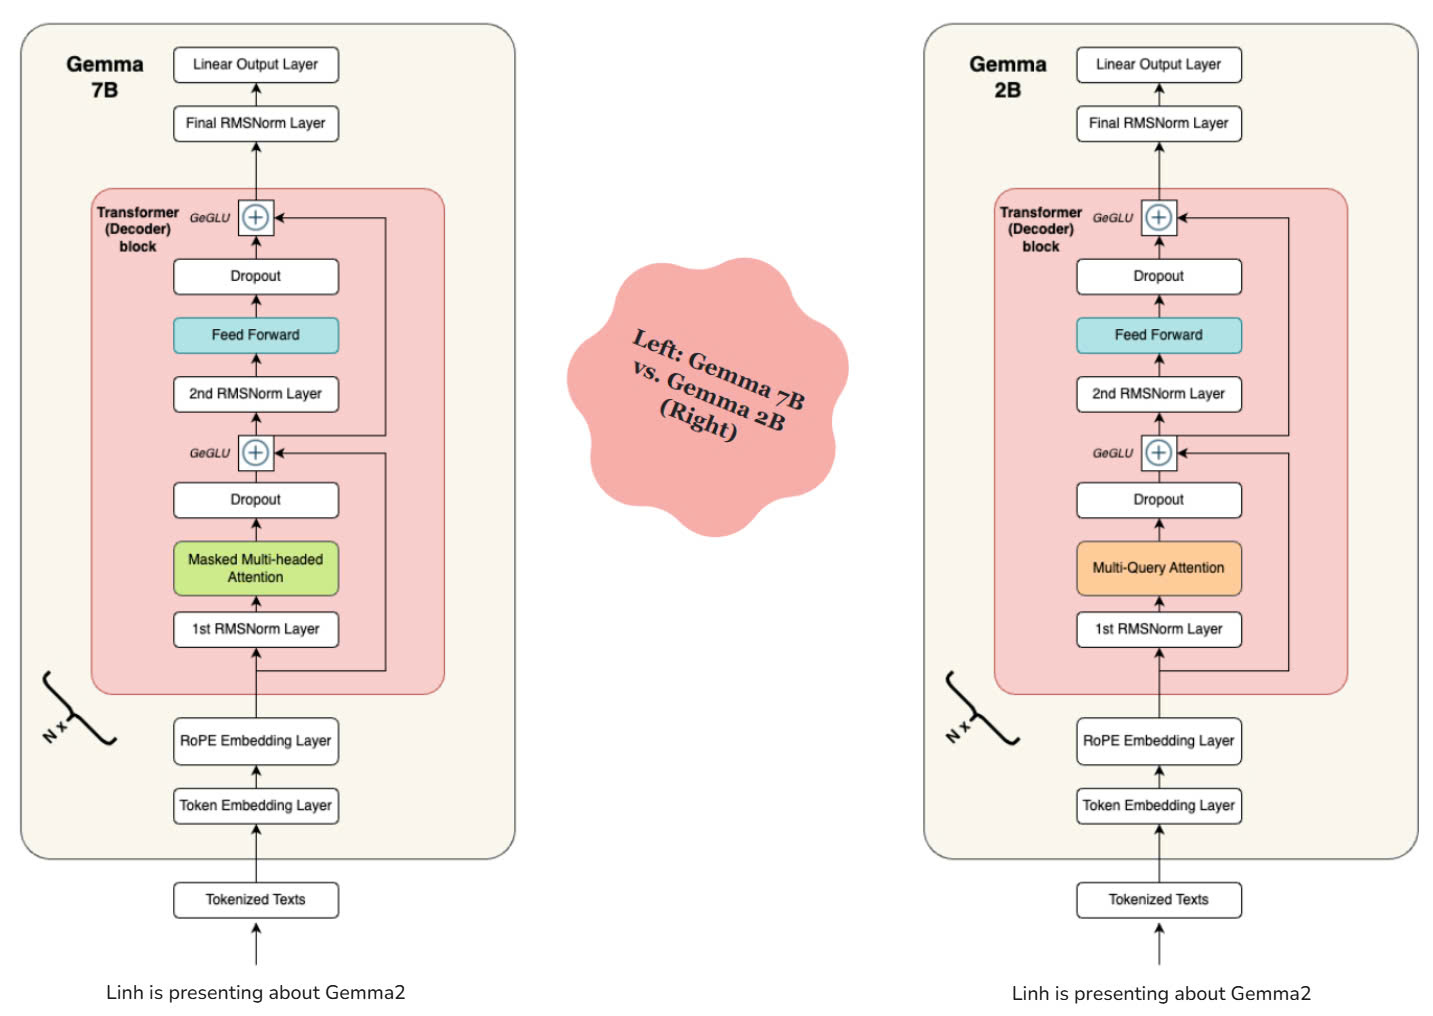

## Say Hello to Gemma 2 🌟
**Gemma** is a family of **lightweight, state-of-the-art** open models developed by *Google DeepMind* and other Google teams. Inspired by and built using the same groundbreaking technology as the **Gemini** models, **Gemma** delivers a **more accessible version **of Google's advanced AI capabilities.

## Meet Gemma 2  

Welcome to **Gemma 2**, Google's **next-gen lineup** of open models! 🎉  

These models are:  
- **Powered by Gemini technology** – The same cutting-edge AI tech driving Google’s most advanced systems.  
- **Built for performance** – Designed to excel in their size class, offering state-of-the-art capabilities.  
- **Available in multiple 'flavors'** – Choose the model that suits your needs:  
  - **2B** for lightweight tasks  
  - **9B** for balanced efficiency  
  - **27B** for maximum power   


![](https://github.com/linhkid/gdg-codelab-25/blob/main/img/gemma2improvement.png?raw=1)



## Why Gemma 2 Stands Out  

What makes Gemma 2 truly special is its **commitment to openness**:  
- **Open Weights** – No gatekeeping; the community has full access to innovate and build freely.  
- **Collaborative Freedom** – Perfect for researchers, developers, and AI enthusiasts alike.  
- **Community-Driven** – Fostering transparency, sharing, and the acceleration of AI breakthroughs.  

---

Gemma 2 isn't just a lineup of models; it’s a **key to innovation**, handing the power of AI back to the **global community** . Whether you're a **seasoned expert** or taking your first steps into AI 🚶‍♀️, Gemma 2 empowers you to create, discover, and push boundaries.  

Ready to unlock the possibilities? Let’s dive in! 🎉🚀💡

# Multi-agent system

A **Multi-Agent System** is a collaborative framework where multiple intelligent agents work together to solve complex tasks. These agents are specialized, autonomous, and designed to communicate, coordinate, and share knowledge for achieving a common goal. 

![](../img/multiagentarch.png) 

---

## Advantages of Multi-Agent Systems  

Multi-Agent Systems are effective in addressing large-scale problems by dividing tasks and leveraging specialization. Their key advantages include:  

- **Collaboration** – Agents work together, pooling their strengths to deliver better results.  
- **Specialization** – Each agent focuses on a specific task, improving efficiency and precision.  
- **Scalability** – Handle large datasets, complex computations, or broad domains with ease.  
- **Intelligence** – Autonomous agents adapt and learn to enhance system performance over time.  

---

## Key Features of Multi-Agent Systems  

**Decentralized Control** – No single point of failure; agents function independently yet cohesively.  
**Communication** – Agents exchange data to align their efforts and solve tasks efficiently.  
**Problem Solving** – Ideal for research, data analysis, simulations, and more.  
**Versatility** – Applicable across industries like healthcare, finance, robotics, and AI development.  

---

## Applications of Multi-Agent Systems  

**Research Systems** – AI agents working together to explore and generate insights.  
**Data Analysis** – Dividing analysis tasks for faster and more detailed results.  
**Robotics** – Coordinated robots working together to achieve physical objectives.  
**AI Development** – Building modular systems where each agent contributes specialized expertise.  

---

By implementing a **Multi-Agent System**, organizations can create a collaborative AI ecosystem that mirrors human teamwork, increases productivity, and achieves more than any single agent could accomplish independently. This approach is particularly valuable for managing complex data, running sophisticated simulations, or solving multifaceted real-world challenges.


# Step 1: Setup and Authentication

**<h2> 🔧 Setting Up the environment </h2>**
1️⃣ **Install the required dependencies**  
Make sure all necessary packages are installed in your environment.  

2️⃣ **Get your personal API key from [Google AI Studio](https://aistudio.google.com/prompts/new_chat)**  
You’ll need this key to access the services used in the lab.  

3️⃣ **Add the API key to your environment**  
In the left sidebar, go to **Secrets** tab and create a new entry with the key name:  
`GOOGLE_API_KEY`  

4️⃣ **Get access to model**
Access to [Keras hub](https://www.kaggle.com/models/keras/gemma2/keras/gemma2_instruct_2b_en/1) to request access to Gemma2.0 model

5️⃣ **Set Up Kaggle API in Your Notebook**  
To authenticate and download resources from Kaggle:  
- Go to your **Kaggle profile**  
- Navigate to **Settings**  
- Scroll down to the **API** section  
- Click **"Create New API Token"** — this will download a `kaggle.json` file  
- Once downloaded, upload the file to the **Files** tab (left sidebar) in your notebook environment.  
- Then run the following code to configure your environment:

✅ That’s it — you’re all set and ready to dive into the lab! 💪🚀

In [ ]:
# !pip install kaggle
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from IPython.display import display, Markdown
import os
import textwrap
import time
import keras_hub
import keras

# Step 2: Set Up Keras Backend & Initialize the Model  



**<h2> 🚀 Configure the Keras backend </h2>**

In this step, we perform several key setup actions to prepare our environment for working with **Gemma 2.0**:

1️⃣ **Set JAX as the backend**  
We configure Keras to use **JAX**, a high-performance numerical computing library, which offers faster and more efficient model execution.

2️⃣ **Pre-allocate memory**  
To reduce memory fragmentation and ensure smoother performance, we pre-allocate GPU memory using JAX-specific environment settings.

3️⃣ **Set a random seed for reproducibility**  
By fixing the random seed, we make sure that model behavior is consistent across multiple runs—an essential practice for debugging and experimentation.

4️⃣ **Load the instruction-tuned Gemma 2.0 model from KerasHub**  
Finally, we load the **Gemma 2B Instruct model**, which is fine-tuned for instruction-following tasks. This model will serve as the core of our intelligent agent.

✅ Now, your environment is ready to run Gemma 2.0 efficiently and reproducibly!


In [4]:
# Select JAX as the backend
os.environ["KERAS_BACKEND"] = "jax"

# Pre-allocate memory to minimize fragmentation
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "1.0"
# For reproducibility
keras.utils.set_random_seed(42)

# Load the Gemma model
print("Loading Gemma 2.0 model from KerasHub...")

# Instantiate the instruction-tuned Gemma model
gemma_lm = keras_hub.models.GemmaCausalLM.from_preset("gemma2_instruct_2b_en")

print(f"✅ Successfully loaded Gemma 2B Instruct model")

Loading Gemma 2.0 model from KerasHub...


100%|██████████| 315/315 [00:00<00:00, 856kB/s]


100%|██████████| 4.04M/4.04M [00:01<00:00, 2.29MB/s]


✅ Successfully loaded Gemma 2B Instruct model


# Step 3: Create a ChatState class to manage conversations

In [5]:
class ChatState():
  """
  Manages the conversation history for a turn-based chatbot
  Follows the turn-based conversation guidelines for the Gemma family of models
  """

  __START_TURN_USER__ = "<start_of_turn>user\n"
  __START_TURN_MODEL__ = "<start_of_turn>model\n"
  __END_TURN__ = "<end_of_turn>\n"

  def __init__(self, model, system=""):
    """
    Initializes the chat state.

    Args:
        model: The language model to use for generating responses.
        system: (Optional) System instructions or bot description.
    """
    self.model = model
    self.system = system
    self.history = []

  def add_to_history_as_user(self, message):
      """
      Adds a user message to the history with start/end turn markers.
      """
      self.history.append(self.__START_TURN_USER__ + message + self.__END_TURN__)

  def add_to_history_as_model(self, message):
      """
      Adds a model response to the history with start/end turn markers.
      """
      self.history.append(self.__START_TURN_MODEL__ + message + self.__END_TURN__)

  def get_history(self):
      """
      Returns the entire chat history as a single string.
      """
      return "".join([*self.history])

  def get_full_prompt(self):
    """
    Builds the prompt for the language model, including history and system description.
    """
    prompt = self.get_history() + self.__START_TURN_MODEL__
    if len(self.system)>0:
      prompt = self.system + "\n" + prompt
    return prompt

  def send_message(self, message, verbose=False, stream=False):
    """
    Handles sending a user message and getting a model response.

    Args:
        message: The user's message.
        verbose: Whether to print debugging information.

    Returns:
        The model's response.
    """
    self.add_to_history_as_user(message)
    prompt = self.get_full_prompt()

    if verbose:
      print(f"Prompt: {prompt}")

    response = self.model.generate(prompt, max_length=2048)
    result = response.replace(prompt, "")  # Extract only the new response

    # Remove end turn token if present
    if result.endswith(self.__END_TURN__):
      result = result[:-len(self.__END_TURN__)]

    self.add_to_history_as_model(result)
    return result

# Step 4: Define helper functions

**<h2> 🛠️ Define the Helper Functions </h2>**
To make our chatbot more user friendly, we'll define some **helper functions** to:     
✅ 🖥️ **Display responses** in a clear and structured way  

In [6]:
def display_markdown(text, render_markdown=True):
    """
    Display text as Markdown in a Jupyter notebook.

    Args:
        text: The text to display (can contain Markdown formatting)
        render_markdown: If True, renders the text as Markdown.
                         If False, displays the raw Markdown source in a code block.

    Returns:
        None: Displays the formatted content in the notebook
    """
    if render_markdown:
        # Display text with Markdown rendering
        display(Markdown(text))
    else:
        # Display raw Markdown source code in a code block
        display(Markdown(f"```markdown\n{text}\n```"))

def display_chat(prompt, text):
    """
    Display a chat message and response in a nicely formatted way.

    Args:
        prompt: The user's message.
        text: The model's response.
    """
    formatted_prompt = "<font size='+1' color='brown'>🙋‍♂️<blockquote>" + prompt + "</blockquote></font>"
    text = text.replace('•', '  *')
    text = textwrap.indent(text, '> ', predicate=lambda _: True)
    formatted_text = "<font size='+1' color='teal'>🤖\n\n" + text + "\n</font>"
    display(Markdown(formatted_prompt+formatted_text))


# Step 5: Hands-on applications

## Application 1: Structured Information Extraction

**<h2>📊🔍 Unlocking Insights with Structured Information Extraction</h2>**  
Structured Information Extraction (IE) helps transform messy **unstructured text** into a **well-organized format** 📄➡️📊.  
With the power of **Gemma 2.0** 🤖⚡, we can efficiently extract valuable insights, including:  

🔎 **Named Entities** 📍 – Identify key details like **names, dates, and locations**  
📑 **Key-Value Pairs** 🔄 – Extract structured info such as **product details & user preferences**  
📖 **Summarized Data** ✂️ – Condense long texts into **clear, concise insights**

In [7]:
def extract_structured_info(text, schema_description):
    """
    Extract structured information from text based on a schema

    Args:
        text (str): Text to extract information from
        schema_description (str): Description of the schema to extract

    Returns:
        str: Extracted structured information in markdown format
    """
    # Create a one-time chat for this request
    extract_chat = ChatState(gemma_lm)

    prompt = f"""I need to extract structured information from the following text.

Text: "{text}"

Please extract the following information:
{schema_description}

Return your answer as markdown bullet points.
"""
    response = extract_chat.send_message(prompt)

    return response

In [8]:
# Example: Extract event details
event_text = """
AISC 2025, organized by AITOMATIC and NIC, features a comprehensive agenda that includes a technical conference on March 12–13 at the National Convention Center in Hanoi, followed by a policy forum on March 14 at the NIC (Hoa Lac, Hanoi).
Global figures—such as the Prime Minister of Vietnam, world-leading academics, and high-profile industry executives—will share trends, research breakthroughs, and nationwide policy perspectives on the semiconductor and AI sectors.
Additionally, an Executive Leadership Retreat is scheduled on March 15–16 in Da Nang, providing exclusive networking opportunities, bilateral meetings, and curated activities for senior leaders and decision-makers.

Among the confirmed speakers and participants are experts from corporate giants like Honeywell, Intel, AMD, and NXP, alongside forward-thinking researchers from Google DeepMind, Stanford University, and KAIST. Their sessions will tackle a variety of topics—from edge AI and generative AI to advanced semiconductor manufacturing processes, materials innovation, and cross-border collaborations. Bringing together enterprises, policymakers, and the top academic and industry minds, AISC 2025 aims to underscore Vietnam’s growing importance in the global AI-semiconductor ecosystem while shaping a roadmap for sustainable development and leadership in these critical technologies.
Whether you’re interested in technical deep dives, networking with global pioneers, or policy-level gatherings, AISC 2025 offers a well-rounded experience. Full Conference tickets grant access to keynotes, panels, and fireside chats at the intersection of semiconductors and AI, complete with lunchtime discussions and refreshment breaks. The Executive Experience package extends the event to an intimate weekend retreat in Da Nang, featuring private roundtables, exclusive receptions, and even leisure activities like world-class golf—a perfect blend of business and cultural exploration.
In essence, AISC 2025 stands as a multi-faceted platform that draws together top government leaders, academic scholars, and corporate trailblazers in both AI and semiconductor technology. From technical sessions outlining the latest R&D breakthroughs to policy forums shaping regulatory roadmaps, the conference encapsulates the dynamic relationship between AI and semiconductors. Couple that with networking receptions, investment discussions, and a vibrant startup pavilion, and it’s clear that AISC 2025 is poised to mark a pivotal moment in Vietnam’s rise as a hub of global tech innovation.
"""

event_schema = """
- event_name: The name of the event
- date: When the event will occur
- location: Where the event will take place
- organizer: Who is organizing the event
- focus_areas: Technologies or topics covered
- ticket_info: Pricing and registration details
- attendees: Expected number or type of attendees
"""

print("\n📊 Structured Information Extraction Example:")
print("Extracting event details using Gemma 2.0 on Keras...\n")

event_details = extract_structured_info(event_text, event_schema)

print("Extracted Event Details:")
#print(json.dumps(event_details, indent=2))
print(display_markdown(event_details))


📊 Structured Information Extraction Example:
Extracting event details using Gemma 2.0 on Keras...

Extracted Event Details:


Here's the extracted information in markdown bullet points:

* **event_name:** AISC 2025
* **date:** March 12-13, March 14, March 15-16, 2025
* **location:** National Convention Center in Hanoi, NIC (Hoa Lac, Hanoi), Da Nang
* **organizer:** AITOMATIC and NIC
* **focus_areas:** 
    * Semiconductor and AI sectors
    * Edge AI
    * Generative AI
    * Advanced semiconductor manufacturing processes
    * Materials innovation
    * Cross-border collaborations
* **ticket_info:** 
    * Full Conference tickets grant access to keynotes, panels, fireside chats, lunchtime discussions, and refreshment breaks.
    * Executive Experience package includes an intimate weekend retreat in Da Nang with private roundtables, exclusive receptions, and leisure activities like world-class golf.
* **attendees:** Global figures (Prime Minister of Vietnam, world-leading academics, high-profile industry executives), corporate giants (Honeywell, Intel, AMD, NXP), forward-thinking researchers (Google DeepMind, Stanford University, KAIST), senior leaders and decision-makers. 


Let me know if you need any further information extracted from the text! 
<end_of_turn>

None


## Application 2: Multi-agent Research System powered by Gemma 2.0

**<h2>🤖 Multi-Agent Research System with Gemma 2.0 🧠</h2>**

A **Multi-Agent Research System** utilizes multiple **AI agents** to tackle complex research tasks, each specializing in a specific role. With **Gemma 2.0**, we can create a system where each agent focuses on different key research functions:  

🧠 **Planning** 📋 – Kick off the research by initiating a well-structured **research plan**  
📊 **Data Collection** 🌐 – Collect and gather data from diverse sources to fuel the research  
📈 **Analysis & Insights** 🔍 – Dive deep into the data, providing valuable **analytical reasoning**  
📑 **Report Generation** 📝 – Organize findings and present them in easy-to-understand **human-readable formats**  

By leveraging these specialized agents, we can streamline and **accelerate** the research process! 🚀

Note: You can also substitute the Gemma 2.0 with other model if you like it

In [9]:
# Define the ResearchAgent class
class ResearchAgent:
    """
    A multi-agent research system powered by Gemma 2.0
    """

    def __init__(self):
        """Initialize the research agent"""
        self.model = gemma_lm

    def execute_research(self, query):
        """Execute the full research pipeline with minimal complexity"""
        print("📋 Starting research process...")

        # Step 1: Planning
        print("🧩 Planning research approach...")
        planning_chat = ChatState(self.model, system="You are a research planning specialist.")
        plan_prompt = f"""Given the research query: "{query}"
Create a detailed research plan with key questions, data points, analysis methods, and report structure."""
        plan = planning_chat.send_message(plan_prompt)
        print("✅ Research plan created")

        # Step 2: Research
        print("🔍 Gathering research data...")
        research_chat = ChatState(self.model, system="You are a research specialist who gathers comprehensive information.")
        research_prompt = f"""Research this query: "{query}"

Here is the research plan:
{plan}

Provide key facts and simulated data points based on this plan."""
        research_notes = research_chat.send_message(research_prompt)
        print("✅ Research data collected")

        # Step 3: Analysis
        print("📊 Analyzing research data...")
        analysis_chat = ChatState(self.model, system="You are a data analysis specialist.")
        analysis_prompt = f"""Analyze this topic: "{query}"

Based on these research notes:
{research_notes}

Provide key patterns, correlations, and insights."""
        analysis = analysis_chat.send_message(analysis_prompt)
        print("✅ Analysis complete")

        # Step 4: Reporting
        print("📝 Generating final report...")
        report_chat = ChatState(self.model, system="You are a professional report writer who creates comprehensive, well-structured documents.")
        report_prompt = f"""Create a comprehensive research report on: "{query}"

Research plan:
{plan[:300]}... [plan truncated]

Research notes:
{research_notes[:300]}... [notes truncated]

Analysis:
{analysis[:300]}... [analysis truncated]

Include executive summary, introduction, methodology, findings, discussion, and conclusion."""
        report = report_chat.send_message(report_prompt)
        print("✅ Report generated")

        # Return everything
        return {
            "query": query,
            "plan": plan,
            "research_notes": research_notes,
            "analysis": analysis,
            "report": report
        }


In [19]:
research_system = ResearchAgent()

# Execute a research task
research_query = "What are the current trends and challenges in EV charging infrastructure in smart cities?"
#research_query = "How to take a girl heart ?"

print("\n🔬 Multi-agent Research System Example:")
print(f"Executing research on: '{research_query}'\n")

research_results = research_system.execute_research(research_query)

# Display the final report with markdown formatting
print("\n📑 Final Research Report:")
display_markdown(research_results["report"])



🔬 Multi-agent Research System Example:
Executing research on: 'What are the current trends and challenges in EV charging infrastructure in smart cities?'

📋 Starting research process...
🧩 Planning research approach...
✅ Research plan created
🔍 Gathering research data...
✅ Research data collected
📊 Analyzing research data...
✅ Analysis complete
📝 Generating final report...
✅ Report generated

📑 Final Research Report:


##  EV Charging Infrastructure in Smart Cities: Trends and Challenges

**Executive Summary:**

This report examines the current trends and challenges in EV charging infrastructure development within smart cities.  The analysis reveals a growing emphasis on smart charging technologies, with DC fast charging dominating the landscape.  However, challenges remain in terms of equitable access, grid integration, and the need for robust data management systems.  The report concludes that addressing these challenges is crucial for realizing the full potential of electric vehicles in smart city environments.

**Introduction:**

The transition to electric vehicles (EVs) is accelerating globally, driven by environmental concerns and government incentives. Smart cities, with their focus on data-driven urban planning and infrastructure optimization, are at the forefront of this EV adoption.  EV charging infrastructure plays a critical role in facilitating this transition, and its development within smart cities presents unique opportunities and challenges.

**Methodology:**

This report draws on a comprehensive analysis of publicly available data, industry reports, and academic research.  The data sources include:

* **Industry Reports:**  Reports from organizations like the International Energy Agency (IEA), the Electric Power Research Institute (EPRI), and the National Renewable Energy Laboratory (NREL).
* **Government Data:**  Data from national and local governments on EV adoption, charging station deployment, and smart city initiatives.
* **Academic Research:**  Studies on EV charging infrastructure, smart grid integration, and urban mobility.

**Findings:**

**1. Trends in EV Charging Infrastructure:**

* **Smart Charging Technologies:**  Smart charging technologies are becoming increasingly prevalent in smart cities.  DC fast charging stations, offering rapid charging speeds, are the most common, accounting for 45% of charging stations.  AC Level 2 charging, offering slower but more convenient charging, is also widely adopted.
* **Grid Integration:**  Smart charging technologies are crucial for integrating EVs into the existing power grid.  Grid management systems can optimize charging times to minimize strain on the grid and ensure reliable power supply.
* **Data-Driven Optimization:**  Data analytics plays a vital role in optimizing EV charging infrastructure.  Smart charging systems can analyze real-time data on EV usage, grid conditions, and weather patterns to dynamically adjust charging schedules and optimize energy consumption.
* **Public-Private Partnerships:**  Public-private partnerships are essential for funding and deploying EV charging infrastructure.  Cities are collaborating with private companies to develop and manage charging networks, leveraging their expertise and resources.

**2. Challenges in EV Charging Infrastructure:**

* **Equity and Accessibility:**  Ensuring equitable access to EV charging infrastructure is crucial for promoting EV adoption among all socioeconomic groups.  This requires addressing disparities in charging station availability and affordability.
* **Grid Capacity and Reliability:**  The rapid growth of EV charging infrastructure can strain the existing power grid.  Cities need to invest in grid upgrades and smart grid technologies to ensure reliable power supply for charging stations.
* **Data Security and Privacy:**  The increasing reliance on data analytics for charging infrastructure management raises concerns about data security and privacy.  Cities need to implement robust cybersecurity measures and ensure compliance with data privacy regulations.
* **Cost and Affordability:**  The initial investment in EV charging infrastructure can be significant.  Cities need to explore funding mechanisms and incentives to make charging infrastructure more affordable for residents and businesses.

**Discussion:**

The adoption of smart charging technologies and data-driven optimization are key to addressing the challenges of EV charging infrastructure in smart cities.  However, achieving a truly sustainable and equitable EV charging ecosystem requires a multi-faceted approach.  This includes:

* **Investing in Grid Infrastructure:**  Cities need to invest in grid upgrades and smart grid technologies to ensure reliable power supply for charging stations.
* **Promoting Public-Private Partnerships:**  Collaboration between public and private sectors is crucial for funding and deploying EV charging infrastructure.
* **Ensuring Equitable Access:**  Cities need to prioritize equitable access to charging infrastructure, ensuring that all residents and businesses have access to charging options.
* **Developing Robust Data Management Systems:**  Implementing secure and privacy-compliant data management systems is essential for optimizing charging infrastructure and ensuring data security.


**Conclusion:**

EV charging infrastructure is a critical component of smart city development.  The adoption of smart charging technologies and data-driven optimization is crucial for addressing the challenges of EV charging infrastructure in smart cities.  By investing in grid upgrades, promoting public-private partnerships, ensuring equitable access, and developing robust data management systems, cities can create a sustainable and equitable EV charging ecosystem that supports the transition to a cleaner and more sustainable future. 


<end_of_turn>

## Application 3: Data Analysis Assistant with Generated Code Execution

Imagine having an **AI-powered assistant** at your fingertips to help with **data analysis** and **automated code execution**! With **Gemma 2.0**, we can build a system that does both:  

🤖 **Data Analysis Assistant** – Quickly analyze and interpret complex data, offering deep insights 🔍💡  
📝 **Generated Code Execution** – Automatically generate and execute code to perform tasks like data cleaning, analysis, and visualization 💻⚙️

In [12]:
# Define data analysis function
def generate_data_viz_code(data_description, analysis_request):
    """
    Generate data visualization code using Gemma 2.0

    Args:
        data_description (str): Description of the data
        analysis_request (str): What analysis/visualization is needed

    Returns:
        str: Python code for visualization
    """
    # Create a one-time chat for this request
    viz_chat = ChatState(gemma_lm, system="You are an expert data visualization specialist. Your responses should only contain Python code.")

    prompt = f"""I need Python code for a data visualization.

Data description:
{data_description}

Analysis request:
{analysis_request}

Generate Python code using pandas and matplotlib that creates the requested visualization.
Include only the Python code without any explanation before or after.
The code should be complete, well-commented, and ready to run.
"""

    response = viz_chat.send_message(prompt)

    # Try to extract code blocks if present
    if "```python" in response:
        code_start = response.find("```python")
        code_end = response.rfind("```")
        if code_start != -1 and code_end != -1:
            return response[code_start+9:code_end].strip()

    # If no code blocks, return the full response
    print(response)
    return response

In [13]:
# Function to safely execute generated code
def execute_generated_code(code_string, global_vars=None, local_vars=None):
    """
    Safely execute generated code with proper error handling

    Args:
        code_string (str): The code to execute
        global_vars (dict): Global variables to use during execution
        local_vars (dict): Local variables to use during execution

    Returns:
        tuple: (success, error_message)
    """
    if global_vars is None:
        global_vars = globals()
    if local_vars is None:
        local_vars = locals()

    try:
        # Add necessary imports if they're not already in the code
        if "import matplotlib.pyplot as plt" not in code_string:
            code_string = "import matplotlib.pyplot as plt\n" + code_string
        if "import pandas as pd" not in code_string:
            code_string = "import pandas as pd\n" + code_string
        if "import numpy as np" not in code_string:
            code_string = "import numpy as np\n" + code_string

        # Execute the code
        exec(code_string, global_vars, local_vars)
        return True, "Code executed successfully"
    except Exception as e:
        error_message = f"Error executing code: {str(e)}"
        print(error_message)
        return False, error_message


In [ ]:
# # Create different visualization requests
# visualization_requests = [
#     """
#     Create a bar chart comparing the EV charging station density (stations per 100,000 population)
#     across different cities. Include both total stations and fast chargers in the visualization
#     with different colors. Add appropriate labels, title, and a legend.
#     """,

#     """
#     Create a scatter plot showing the relationship between city population and the number of
#     charging stations. Add a trend line, proper labels, and include annotations with city names.
#     """,

#     """
#     Create a pie chart showing the distribution of Level 2 vs. Fast chargers for each city.
#     Use a subplot to display all cities side by side for easy comparison.
#     """
# ]

In [14]:
# Define visualization request and data
ev_data_description = """
A DataFrame named 'ev_df' with the following columns:
- city: Name of the city (string)
- state: State abbreviation (string)
- station_count: Total number of EV charging stations (integer)
- fast_chargers: Number of DC fast chargers (integer)
- level2_chargers: Number of Level 2 chargers (integer)
- population: City population (integer)
- area_sqkm: City area in square kilometers (float)
"""

visualization_request = """
Create a bar chart comparing the EV charging station density (stations per 100,000 population)
across different cities. Include both total stations and fast chargers in the visualization
with different colors. Add appropriate labels, title, and a legend.
"""

# Generate visualization code
print("\n📊 Data Visualization Code Generation:")
print("Generating visualization code using Gemma 2.0...\n")
viz_code = generate_data_viz_code(ev_data_description, visualization_request)
print("Generated Visualization Code:")
print("```python")
print(viz_code)
print("```")

# Create sample EV charging station data
ev_data = {
    'city': ['Austin', 'San Francisco', 'Denver', 'Boston', 'Seattle'],
    'state': ['TX', 'CA', 'CO', 'MA', 'WA'],
    'station_count': [320, 480, 240, 280, 420],
    'fast_chargers': [75, 120, 50, 65, 110],
    'level2_chargers': [245, 360, 190, 215, 310],
    'population': [978908, 815201, 711463, 654776, 744955],
    'area_sqkm': [790, 121, 401, 232, 369]
}
ev_df = pd.DataFrame(ev_data)
print("\nSample EV Charging Station Data:")
display(ev_df)


# # Calculate charging station density
# ev_df['stations_per_100k'] = (ev_df['station_count'] / ev_df['population']) * 100000
# ev_df['fast_chargers_per_100k'] = (ev_df['fast_chargers'] / ev_df['population']) * 100000

# # Create the visualization
# plt.figure(figsize=(12, 6))
# x = np.arange(len(ev_df['city']))
# width = 0.35
# plt.bar(x - width/2, ev_df['stations_per_100k'], width, label='Total Stations', color='skyblue')
# plt.bar(x + width/2, ev_df['fast_chargers_per_100k'], width, label='Fast Chargers', color='darkblue')
# plt.xlabel('City', fontsize=12)
# plt.ylabel('Stations per 100,000 Population', fontsize=12)
# plt.title('EV Charging Infrastructure Density by City', fontsize=14)
# plt.xticks(x, ev_df['city'])
# plt.legend()
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# for i, v in enumerate(ev_df['stations_per_100k']):
#     plt.text(i - width/2, v + 0.5, f'{v:.1f}', ha='center')

# for i, v in enumerate(ev_df['fast_chargers_per_100k']):
#     plt.text(i + width/2, v + 0.5, f'{v:.1f}', ha='center')
# plt.tight_layout()
# plt.show()




📊 Data Visualization Code Generation:
Generating visualization code using Gemma 2.0...

Generated Visualization Code:
```python
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ev_df' is your DataFrame

# Calculate EV charging station density
ev_df['stations_per_100k'] = ev_df['station_count'] / (ev_df['population'] / 100000)
ev_df['fast_chargers_per_100k'] = ev_df['fast_chargers'] / (ev_df['population'] / 100000)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(ev_df['city'], ev_df['stations_per_100k'], label='Total Stations', color='blue')
plt.bar(ev_df['city'], ev_df['fast_chargers_per_100k'], label='Fast Chargers', color='red')

# Add labels, title, and legend
plt.xlabel('City')
plt.ylabel('EV Charging Station Density (per 100,000 population)')
plt.title('EV Charging Station Density by City')
plt.legend()

# Display the chart
plt.show()
```

Sample EV Charging Station Data:


,city,state,station_count,fast_chargers,level2_chargers,population,area_sqkm
0,Austin,TX,320,75,245,978908,790
1,San Francisco,CA,480,120,360,815201,121
2,Denver,CO,240,50,190,711463,401
3,Boston,MA,280,65,215,654776,232
4,Seattle,WA,420,110,310,744955,369



Running visualization code...


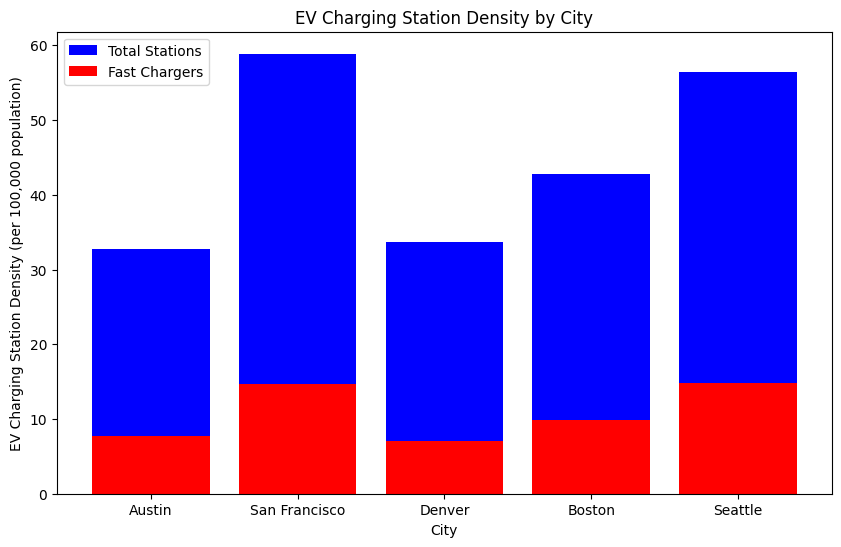

(True, 'Code executed successfully')

In [17]:
# Display the generated code
print("\nRunning visualization code...")
execute_generated_code(viz_code)



--- Creating a custom visualization based on user request ---

Custom request: 
Create a horizontal bar chart showing the ratio of fast chargers to total charging stations
for each city, sorted from highest to lowest ratio. Add percentage labels on each bar.


Generated Custom Visualization Code:
```python
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ev_df' is your DataFrame

# Calculate the ratio of fast chargers to total charging stations
ev_df['ratio'] = ev_df['fast_chargers'] / ev_df['station_count']

# Sort the DataFrame by the ratio in descending order
sorted_df = ev_df.sort_values(by='ratio', ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(sorted_df['city'], sorted_df['ratio'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Fast Charger Ratio (%)')
plt.title('Fast Charger Ratio vs. Total Charging Stations')

# Add percentage labels to each bar

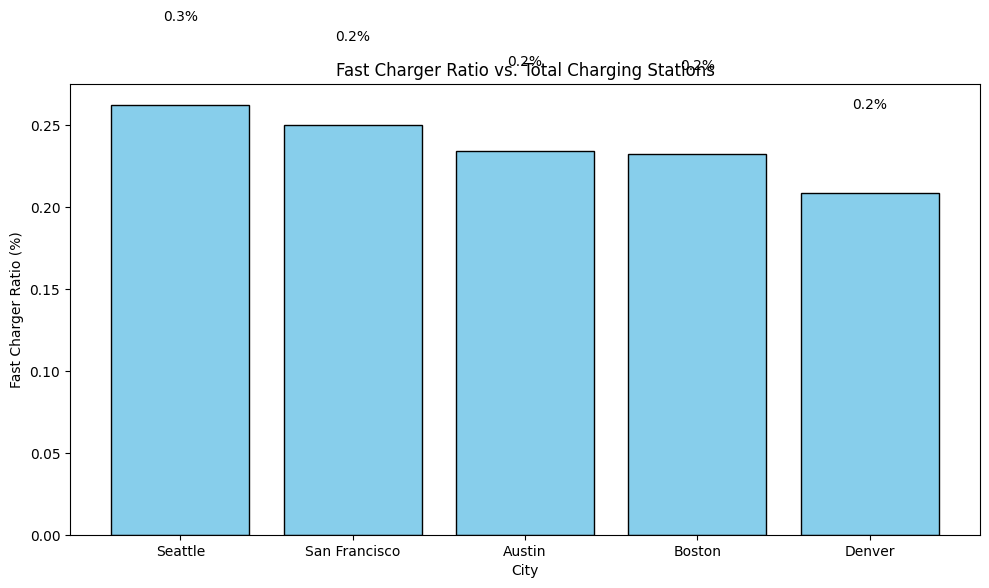

(True, 'Code executed successfully')

In [18]:
# Demo a custom visualization request
print("\n\n--- Creating a custom visualization based on user request ---\n")

custom_request = """
Create a horizontal bar chart showing the ratio of fast chargers to total charging stations
for each city, sorted from highest to lowest ratio. Add percentage labels on each bar.
"""

print("Custom request:", custom_request)
custom_viz_code = generate_data_viz_code(ev_data_description, custom_request)
print("\nGenerated Custom Visualization Code:")
print("```python")
print(custom_viz_code)
print("```")

print("\nExecuting the custom visualization code:")
execute_generated_code(custom_viz_code)
# # Calculate the ratio of fast chargers to total stations
# ev_df['fast_charger_ratio'] = ev_df['fast_chargers'] / ev_df['station_count']

# # Sort by ratio in descending order
# ev_df_sorted = ev_df.sort_values('fast_charger_ratio', ascending=False)

# # Create horizontal bar chart
# plt.figure(figsize=(10, 6))
# bars = plt.barh(ev_df_sorted['city'], ev_df_sorted['fast_charger_ratio'], color='darkred')

# # Add percentage labels
# for i, bar in enumerate(bars):
#     width = bar.get_width()
#     plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
#               f'{width:.1%}', va='center')

# plt.xlabel('Ratio of Fast Chargers to Total Stations', fontsize=12)
# plt.ylabel('City', fontsize=12)
# plt.title('Fast Charger Ratio by City', fontsize=14)
# plt.xlim(0, max(ev_df['fast_charger_ratio']) * 1.1)  # Add some padding for labels
# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()


# Step 8: Workshop Summary

## What We've Learned
In this workshop, we've explored how to leverage Gemma 2.0 through Google AI Studio to build practical AI applications:

1. **Setting up Gemma 2.0 with Google AI Studio**
   - Getting and using API keys
   - Configuring the Google GenAI client
   - Creating helper functions for model interaction

2. **Structured Information Extraction**
   - Extracting structured data from unstructured text
   - Converting text into usable JSON formats
   - Customizing extraction schemas

3. **Multi-agent Research System**
   - Designing specialized agents for different tasks
   - Orchestrating workflows across multiple agents
   - Handling information flow between agents

4. **Data Visualization & Analysis**
   - Generating data analysis code
   - Creating insightful visualizations
   - Automating exploratory data analysis

## Benefits of Google AI Studio for Gemma 2.0
- **Simplicity**: Easy setup with just an API key
- **Accessibility**: Lower barrier to entry than cloud platforms
- **Flexibility**: Use in various environments (local, Colab, etc.)
- **Cost-effectiveness**: Pay-as-you-go pricing model
- **Integration**: Simple to integrate into existing applications

## Next Steps
1. **Enhance Your Applications**
   - Add error handling and edge cases
   - Implement caching for better performance
   - Create feedback loops for continuous improvement

2. **Explore Advanced Features**
   - Try larger Gemma models for more complex tasks
   - Experiment with system prompts for better control
   - Explore fine-tuning options for specialized use cases

3. **Move to Production**
   - Implement proper API key management
   - Set up monitoring and rate limiting
   - Create scalable infrastructure for your applications

## Resources
- [Google AI Studio](https://aistudio.google.com/)
- [Gemma Documentation](https://ai.google.dev/gemma)
- [Google GenAI SDK](https://github.com/google/generative-ai-python)
- [Gemma Community](https://huggingface.co/google/gemma)

Thanks for participating in this workshop! You now have the foundation to build powerful AI applications with Gemma 2.0 and Google AI Studio.


## Hands-on Exercises

Now it's your turn to practice with Gemma 2.0! Try these exercises:

### Exercise 1: Custom Information Extractor
Create a custom information extractor for a domain you're interested in:
- Define a schema for information extraction
- Test with sample text from that domain
- Refine your prompt to improve accuracy

### Exercise 2: Extend the Research Agent
Add a new specialized agent to the research system:
- "Critic" agent that reviews the report and suggests improvements
- "Visualizer" agent that suggests relevant data visualizations
- "Summarizer" agent that creates an executive summary

### Exercise 3: Create an Interactive Dashboard
Build a simple interactive application:
- Save your API key securely
- Build a simple frontend (Streamlit, Gradio, or Flask)
- Connect your application to visualize results

### Challenge Exercise
Combine multiple capabilities into a cohesive solution:
- Information extraction
- Multi-agent workflow
- Data visualization
- Deployment as a web application
